In [48]:
%reset -f 

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target

In [50]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# GaussianMixture

In [69]:
# The GaussianMixture object implements the expectation-maximization (EM) algorithm 
# for fitting mixture-of-Gaussian models.

In [58]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)
y_pred=gmm.predict(X)

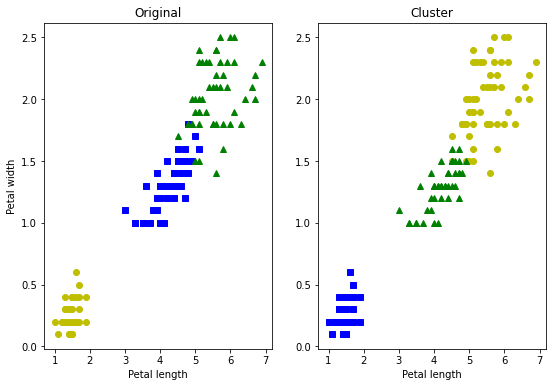

In [52]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(9,6))
ax1.plot(X[y==0, 2], X[y==0, 3], "yo", label="setosa")
ax1.plot(X[y==1, 2], X[y==1, 3], "bs", label="versicolor")
ax1.plot(X[y==2, 2], X[y==2, 3], "g^", label="virginica")

ax2.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
ax2.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
ax2.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")

ax1.set_title("Original")
ax2.set_title("Cluster")

ax1.set_ylabel("Petal width")
# ax2.set_ylabel("Petal width")

ax1.set_xlabel("Petal length")
ax2.set_xlabel("Petal length")

plt.show()

In [59]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [60]:
y_pred = np.where(y_pred==1,"setosa",y_pred)
y_pred = np.where(y_pred=="2","versicolor",y_pred)
y_pred = np.where(y_pred=="0","virginica",y_pred)

In [42]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [61]:
y = np.where(y==0,"setosa",y)
y = np.where(y=="1","versicolor",y)
y = np.where(y=="2","virginica",y)

In [62]:
(y_pred==y).sum() / len(y_pred)

0.9666666666666667

# KMeans

In [67]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)

X = data.data
y = data.target

y_pred = kmeans.fit_predict(X)

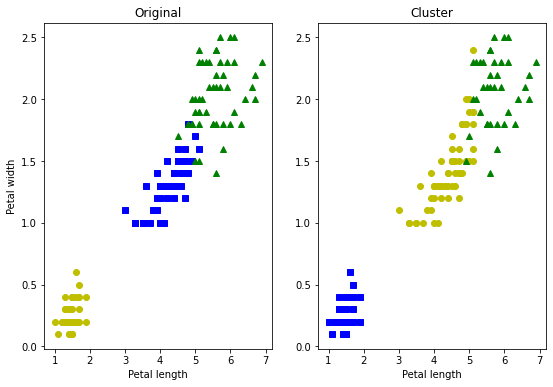

In [68]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(9,6))
ax1.plot(X[y==0, 2], X[y==0, 3], "yo", label="setosa")
ax1.plot(X[y==1, 2], X[y==1, 3], "bs", label="versicolor")
ax1.plot(X[y==2, 2], X[y==2, 3], "g^", label="virginica")

ax2.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
ax2.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
ax2.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")

ax1.set_title("Original")
ax2.set_title("Cluster")

ax1.set_ylabel("Petal width")
# ax2.set_ylabel("Petal width")

ax1.set_xlabel("Petal length")
ax2.set_xlabel("Petal length")

plt.show()

# Elbow graph

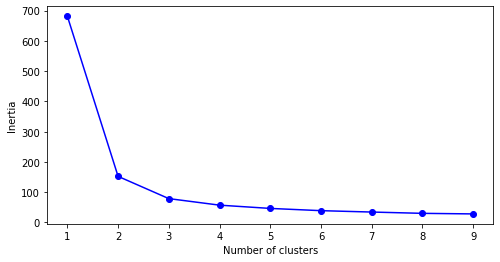

In [73]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

# Color Segmentation

In [79]:
%ls 

 Volume in drive C is System
 Volume Serial Number is EE4C-9909

 Directory of C:\Amit\BITS\Misc\ML

10/08/2022  02:15 AM    <DIR>          .
10/08/2022  02:15 AM    <DIR>          ..
10/08/2022  01:08 AM    <DIR>          .ipynb_checkpoints
10/08/2022  02:14 AM            58,165 Clustering.ipynb
10/08/2022  12:50 AM    <DIR>          handson-ml3
10/08/2022  02:15 AM           574,025 ladybug.png
               2 File(s)        632,190 bytes
               4 Dir(s)  172,232,679,424 bytes free


In [80]:
import PIL

image = np.asarray(PIL.Image.open("ladybug.png"))
image.shape

(533, 800, 3)

In [81]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

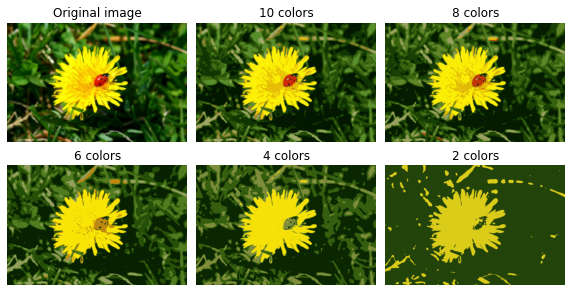

In [83]:
# extra code – this cell generates and saves Figure 9–12

segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(2, 3, 2 + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title(f"{n_clusters} colors")
    plt.axis('off')
plt.show()

# Clustering for Preprocessing

In [100]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

c:\users\amit.kumar02\miniconda3\envs\poc\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [101]:
log_reg.score(X_test, y_test)

0.9711111111111111

In [104]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
("kmeans", KMeans(n_clusters=100)),
("log_reg", LogisticRegression()),
])
pipeline.fit(X_train, y_train)

c:\users\amit.kumar02\miniconda3\envs\poc\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(steps=[('kmeans', KMeans(n_clusters=100)),
                ('log_reg', LogisticRegression())])

In [105]:
pipeline.score(X_test, y_test)

0.96

# Semi-Supervised Learning

In [106]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [107]:
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

c:\users\amit.kumar02\miniconda3\envs\poc\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [108]:
log_reg.score(X_test, y_test)

0.8444444444444444

In [109]:
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

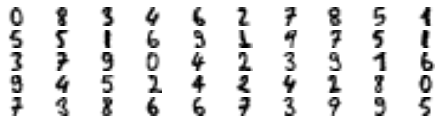

In [111]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')
plt.show()

*Manually Label It*

In [114]:
y_representative_digits = np.array([0,8,3,4,6,2,7,8,5,1,
                                   5,5,1,6,9,1,9,7,5,1,
                                    3,7,9,0,4,2,3,9,1,6,
                                    9,4,5,2,4,2,4,2,8,0,
                                    7,3,8,6,6,7,3,9,9,5
                                   
                                   ])

In [115]:
len(y_representative_digits)

50

In [116]:
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

c:\users\amit.kumar02\miniconda3\envs\poc\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8866666666666667

*Label Propagation*